<a href="https://colab.research.google.com/github/napoles-uach/AI4sci_UAM/blob/main/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf

In [3]:
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
print(tf.__version__)

2.3.0


In [5]:
from tensorflow import keras

In [6]:
print(tf.keras.__version__)

2.4.0


In [7]:
from tensorflow import keras

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

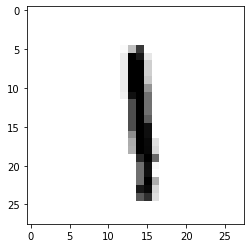

In [10]:
plt.imshow(x_train[8],cmap=plt.cm.binary)

In [11]:
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

In [12]:
print(y_train[8])

1


In [13]:
print(x_train.ndim)

3


# Preprocessing

Conversion from integer to float
Normalization to 1 to improve convergence!!

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Conversion to the input 28x28 to row vector of 784

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# One-hot encoding!!

In [17]:
from tensorflow.keras.utils import  to_categorical

In [18]:
print(y_test[0])

7


In [19]:
y_train = to_categorical(y_train,num_classes=10)

In [20]:
y_test = to_categorical(y_test,num_classes=10)

In [21]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Model Definition
![](https://github.com/napoles-uach/AI4sci_UAM/blob/main/Captura%20de%20pantalla%202020-10-28%20a%20la(s)%2010.18.21.png)



In [22]:
from keras.models import  Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


# Setting the learning process
$$L=\sum y_i \log(\hat y_i)$$
sgd=stocastic grad. desc.

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [25]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8994 - accuracy: 0.4852
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3286 - accuracy: 0.6987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0266 - accuracy: 0.7699
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8455 - accuracy: 0.8094
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7249 - accuracy: 0.8346


# Assesment of the model


In [26]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6614 - accuracy: 0.8532


In [27]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8532000184059143


# Confusion matrix

# Generation of Predictions

In [43]:
num=12

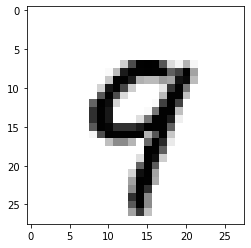

In [44]:
plt.imshow(x_test.reshape(10000,28,28)[num],cmap=plt.cm.binary)

In [29]:
predictions = model.predict(x_test)

In [45]:
np.argmax(predictions[num])

9

In [46]:
print(predictions[num])

[0.   0.   0.   0.   0.24 0.01 0.03 0.09 0.01 0.6 ]


In [47]:
np.sum(predictions[num])

0.99999994